<a href="https://colab.research.google.com/github/marcinwolter/Autoencoder/blob/main/Autoencoder_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'> **Outlier detection with autoencoders**

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction.

<img src='https://stackabuse.s3.amazonaws.com/media/image-reconstruction-and-denoising-with-autoencoders-in-python-and-keras-3.png' width=500px>

# **Simple autoencoder**

In [1]:
import keras
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np
np.random.seed(10)

In [2]:
import numpy as np
from tensorflow.keras import layers
from keras.models import Model


# Read MNIST data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

# Reshape data (only if you use the fully connected network)

In [4]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Hyperparameters

In [5]:
encoding_dim = 30 # valid for fully connected network only
batch_size = 128
epochs = 10 #100

# **Fully connected autoencoder**

In [6]:

# This is our input image
input_img = layers.Input(shape=(784))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dropout(0.05)(encoded)
encoded = layers.Dense(encoding_dim, activation='linear')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dropout(0.05)(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)


# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
#encoder = Model(input_img, encoded)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                7710      
                                                                 
 dense_3 (Dense)             (None, 256)               7936      
                                                                 
 dense_4 (Dense)             (None, 512)               131584

# **Convolutional autoencoder**

Should work better than the fully connected one

In [7]:
'''
# Autoencoder with convolutional network
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
'''

'\n# Autoencoder with convolutional network\ninput = layers.Input(shape=(28, 28, 1))\n\n# Encoder\nx = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)\nx = layers.MaxPooling2D((2, 2), padding="same")(x)\nx = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)\nx = layers.MaxPooling2D((2, 2), padding="same")(x)\n\n# Decoder\nx = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)\nx = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)\nx = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)\n\n# Autoencoder\nautoencoder = Model(input, x)\nautoencoder.compile(optimizer="adam", loss="binary_crossentropy")\nautoencoder.summary()\n'

# Train the autoencoder

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 11s 7ms/step - loss: 0.1610 - val_loss: 0.1055
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1042 - val_loss: 0.0925
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0959 - val_loss: 0.0880
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0921 - val_loss: 0.0857
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0899 - val_loss: 0.0843
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0884 - val_loss: 0.0830
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0873 - val_loss: 0.0820
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0864 - val_loss: 0.0817
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0856 - val_loss: 0.0808
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0851 - val_loss: 0.08

# Plot history

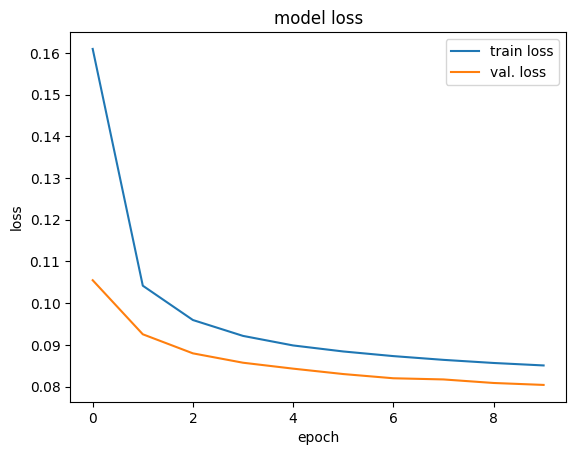

In [9]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','val. loss'], loc='upper right')
plt.show()

# Plot digits

313/313 [==============================] - 1s 4ms/step


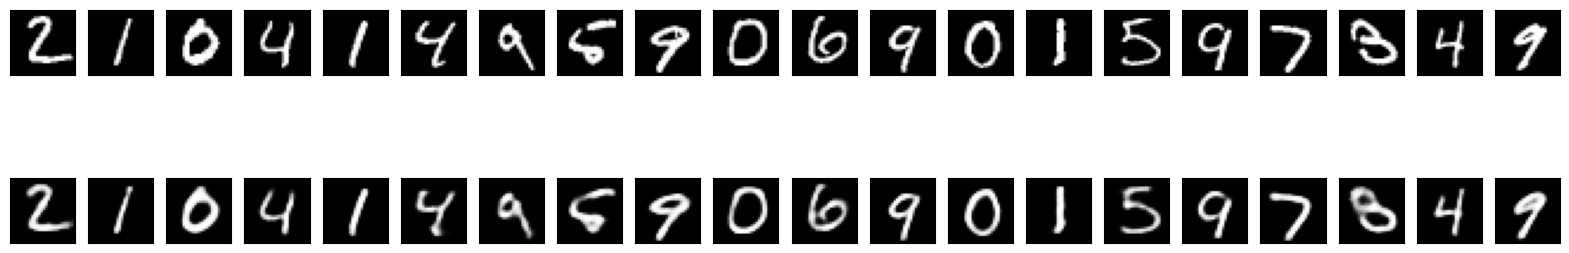

In [10]:
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Read fashion mnist

In [11]:
(xf_train, yf_train), (xf_test, yf_test) = fashion_mnist.load_data()

xf_train = xf_train / 255.
xf_test = xf_test / 255.

# Reshape fashion data (only if you use the fully connected network)

In [12]:
xf_train = xf_train.reshape((xf_train.shape[0], -1))
xf_test = xf_test.reshape((xf_test.shape[0], -1))

# Plot fashion digits

313/313 [==============================] - 1s 3ms/step


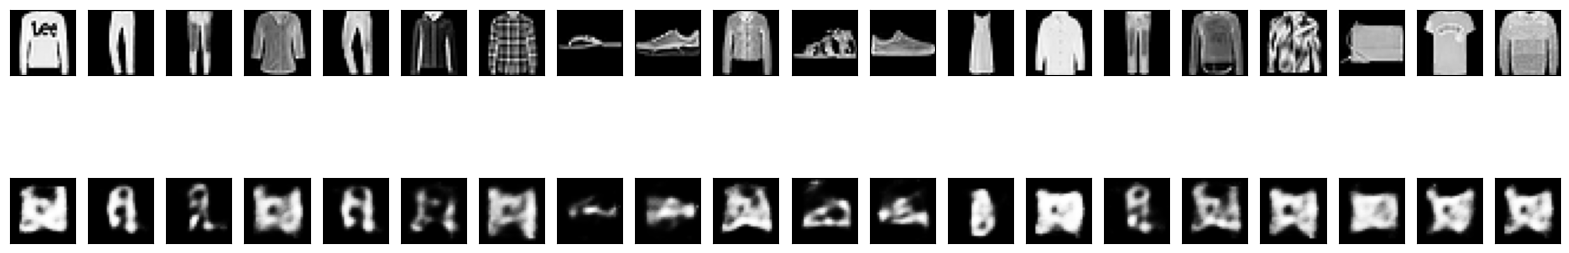

In [13]:
fashion_decoded_imgs = autoencoder.predict(xf_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(xf_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(fashion_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Calculate the losses for mnist digits and fasion mnist and plot a histogram

### Reshape only if you use the convolutional autoencoder

In [14]:
#decoded_imgs = decoded_imgs.reshape((decoded_imgs.shape[0], -1))
#fashion_decoded_imgs = fashion_decoded_imgs.reshape((fashion_decoded_imgs.shape[0], -1))
#x_test = x_test.reshape((x_test.shape[0], -1))
#xf_test = xf_test.reshape((xf_test.shape[0], -1))

In [15]:
losses = keras.losses.mean_squared_error(decoded_imgs, x_test)
#print(losses[0:20])
fashion_losses = keras.losses.mean_squared_error(fashion_decoded_imgs, xf_test)
#print(fashion_losses[0:20])

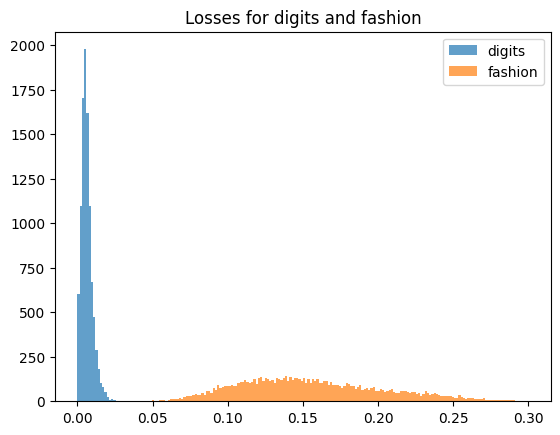

In [17]:
plt.hist(losses,bins=200,range=(0,0.3),label="digits",alpha=0.7)
plt.hist(fashion_losses,bins=200,range=(0,0.3),label="fashion",alpha=0.7)
plt.title("Losses for digits and fashion")
plt.legend()
#plt.yscale('log')
plt.show()

# Outlier detection

The autoencoder is trained on mnist hand-written digits. Therefore it does not reproduce the fashion elements well, therefore the losses are much higher than for mnist digits. Putting a cut on losses allows to identify the outliers.

### Remark
The autoencoder was never trained on "fashion" images.